In [ ]:
#from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

#import datetime
#import os.path
#import sys
#import backtrader as bt

#class TestStrategy(bt.Strategy):
#    def log(self, txt, dt=None):
#        dt = dt or self.datas[0].datetime.date(0)
#        print('%s, %s' % (dt.isoformat(), txt))

#    def __init__(self):
#        self.dataclose = self.datas[0].close
#        self.order = None
#        self.buyprice = None
#        self.buycomm = None

#        self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=15)
#        self.rsi = bt.indicators.RelativeStrengthIndex()

#    def notify_order(self, order):
#        if order.status in [order.Submitted, order.Accepted]:
#            return

#        if order.status in [order.Completed]:
#            if order.isbuy():
#                self.log(
#                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
#                    (order.executed.price,
#                     order.executed.value,
#                     order.executed.comm))
#
#               self.buyprice = order.executed.price
#                self.buycomm = order.executed.comm
#            else:  # Sell
#                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
#                        (order.executed.price,
#                          order.executed.value,
#                          order.executed.comm))

#            self.bar_executed = len(self)

#        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
#        self.order = None

#    def notify_trade(self, trade):
#        if not trade.isclosed:
#            return

#        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
#                 (trade.pnl, trade.pnlcomm))

#    def next(self):
#       self.log('Close, %.2f' % self.dataclose[0])
#        print('rsi:', self.rsi[0])
#        if self.order:
#            return

#        if not self.position:
#            if (self.rsi[0] < 30):
#                self.log('BUY CREATE, %.2f' % self.dataclose[0])
#                self.order = self.buy(size=500)

#        else:
#            if (self.rsi[0] > 70):
#                self.log('SELL CREATE, %.2f' % self.dataclose[0])
#                self.order = self.sell(size=500)

In [ ]:
#if __name__ == '__main__':
#    cerebro = bt.Cerebro()
#    cerebro.addstrategy(TestStrategy)
#    cerebro.broker.setcommission(commission=0.001)
    
#    datapath = 'FB.csv'

    # Create a Data Feed
#    data = bt.feeds.YahooFinanceData(
#        dataname=datapath,
#        fromdate=datetime.datetime(2013, 1, 1),
#        todate=datetime.datetime(2018, 8, 5),
#        reverse=True)
    
#    cerebro.adddata(data)
#    cerebro.broker.setcash(100000.0)
#    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
#    cerebro.run()
#    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
#    cerebro.plot()

Final Portfolio Value: $10000.0
P/L: $0.0


<IPython.core.display.Javascript object>


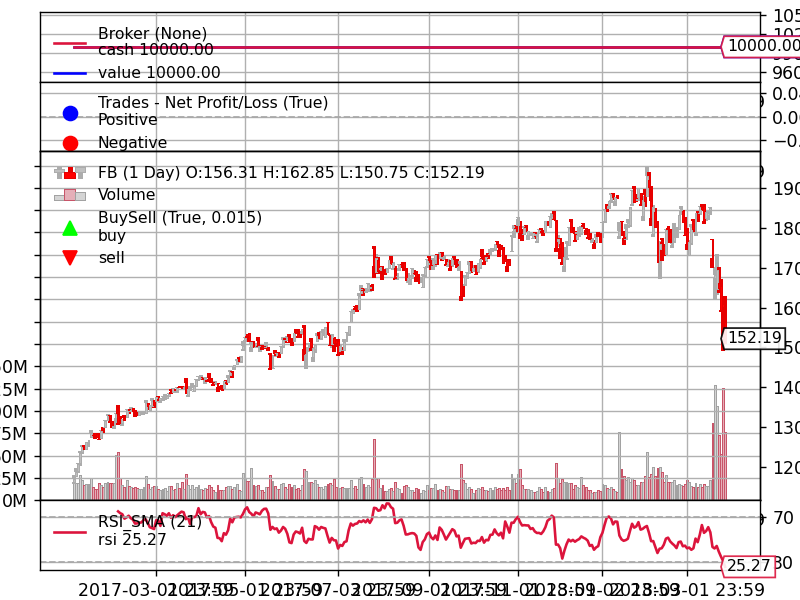

[[<Figure size 640x480 with 5 Axes>]]

In [4]:
##SOURCE ----- https://backtest-rookies.com/2017/06/02/getting-started-first-script/

import backtrader as bt
from datetime import datetime

class firstStrategy(bt.Strategy):

    def __init__(self):
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=21)

    def next(self):
        if not self.position:
            if self.rsi < 50:
                self.buy(size=100)
        else:
            if self.rsi > 70:
                self.sell(size=100)


#Variable for our starting cash
startcash = 10000

#Create an instance of cerebro
cerebro = bt.Cerebro()

#Add our strategy
cerebro.addstrategy(firstStrategy)

#Get Apple data from Yahoo Finance.
data = bt.feeds.Quandl(
    dataname='FB',
    fromdate = datetime(2017,1,1),
    todate = datetime(2019,1,1),
    buffered= True
    )

#Add the data to Cerebro
cerebro.adddata(data)

# Set our desired cash start
cerebro.broker.setcash(startcash)

# Run over everything
cerebro.run()

#Get final portfolio Value
portvalue = cerebro.broker.getvalue()
pnl = portvalue - startcash

#Print out the final result
print('Final Portfolio Value: ${}'.format(portvalue))
print('P/L: ${}'.format(pnl))

#Finally plot the end results
cerebro.plot(style='candlestick')